In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Step 2: Load real diamonds dataset
df = pd.read_csv('C:\\Users\\Ali\\Desktop\\diamonds.csv')

In [3]:
# Step 3: Initial inspection of data
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# Step 4: Check and fill missing values (if any)
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [7]:
# Step 5: Standardize column names
df.columns = [col.lower() for col in df.columns]

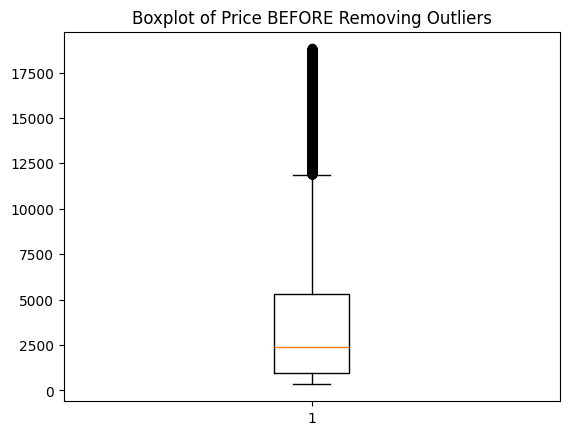

Before removing outliers: (53940, 10)
After removing outliers: (50400, 10)


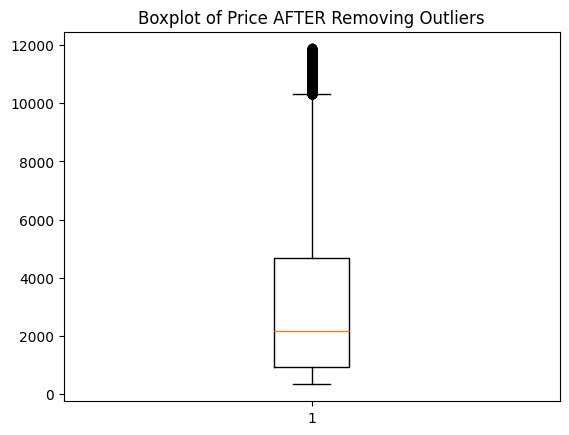

In [8]:
# Step 6: Detect outliers using IQR for 'price'
import matplotlib.pyplot as plt

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot BEFORE removing outliers
plt.figure()
plt.boxplot(df['price'])
plt.title('Boxplot of Price BEFORE Removing Outliers')
plt.show()

print('Before removing outliers:', df.shape)
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print('After removing outliers:', df.shape)

# Boxplot AFTER removing outliers
plt.figure()
plt.boxplot(df['price'])
plt.title('Boxplot of Price AFTER Removing Outliers')
plt.show()


In [9]:
# Step 7: Remove duplicates
print('Duplicates before:', df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('Duplicates after:', df.duplicated().sum())

Duplicates before: 134
Duplicates after: 0


In [10]:
# Step 8: Plot interactive scatter with Plotly
import plotly.io as pio
pio.renderers.default = "notebook_connected"  # or 'browser' if running outside Jupyter

import plotly.express as px

fig = px.scatter(
    df, 
    x='carat', 
    y='price',
    color='cut',               # color by cut type
    size='carat',              # size by carat
    hover_data=['color','clarity'],  # show color and clarity on hover
    title='Interactive Scatter Plot: Price vs Carat',
    template='plotly_dark',    # dark template for style
)

fig.update_layout(
    title_font_size=20,
    xaxis_title='Carat',
    yaxis_title='Price',
    legend_title='Cut Type',
    width=900,
    height=600
)

fig.show()



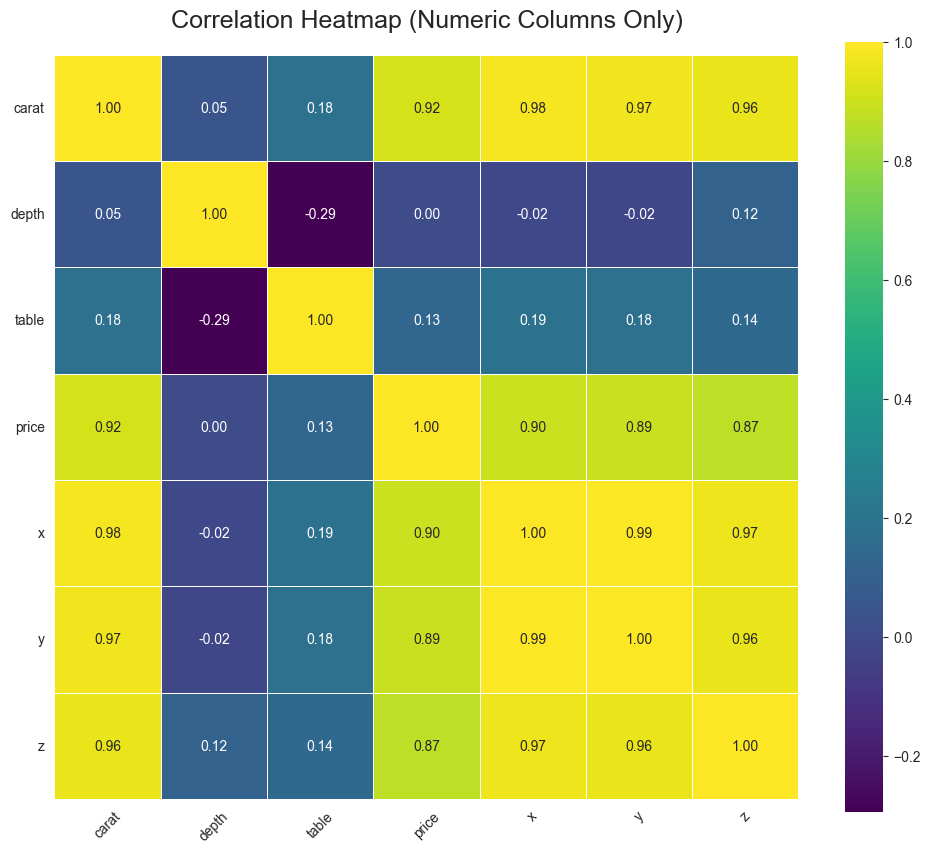

In [11]:
# Step 9: Plot heatmap of correlations
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(12,10))
sns.set_style("white")  


sns.heatmap(
    df[numeric_cols].corr(), 
    annot=True, 
    fmt=".2f", 
    cmap='viridis',   
    cbar=True, 
    linewidths=0.5,   
    linecolor='white', 
    square=True
)

plt.title('Correlation Heatmap (Numeric Columns Only)', fontsize=18, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [12]:
# Step 10: Save cleaned data
df.to_csv('diamonds_cleaned.csv', index=False)
print('Data cleaning complete. Cleaned file saved as diamonds_cleaned.csv')

Data cleaning complete. Cleaned file saved as diamonds_cleaned.csv
